# Machine Learning


---

**Maestría en Ingeniería en Computación**

**Alumno:** Gerardo Iván Torres Cisneros

**Matrícula:** 234375

**Catedrático:** Dra. Olanda Prieto Ordaz

**Fecha:** 03 de octubre del 2023

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml ('mnist_784', version=1)
mnist.keys()

/home/torrescayo/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']



In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [7]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [8]:
some_digit = X.iloc[30].values

some_digit_image = some_digit.reshape(28, 28)

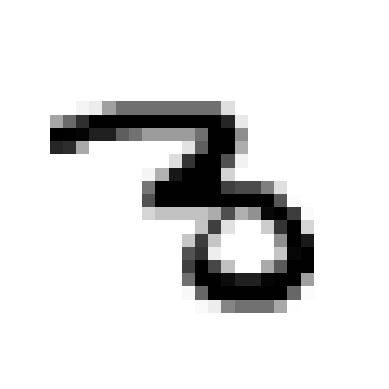

In [9]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [10]:
y[30]

'3'

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Binary classification**

In [12]:
y_train_3 = (y_train == '3')
y_test_3 = (y_test == '3')

In [13]:
import numpy as np
print(np.unique(y_train_3))


[False  True]


In [14]:
#Lo hacemos reproducible
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit]) # make it predict some digit

/home/torrescayo/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [16]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

X_train = X_train.values  # Si X_train es un DataFrame, conviértelo a un arreglo NumPy
y_train_3 = y_train_3.values

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=None)


for train_index, test_index in skfolds.split(X_train, y_train_3):
    clone_cfl = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_3[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_3[test_index]

    clone_cfl.fit(X_train_folds, y_train_folds)
    y_pred = clone_cfl.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9658
0.95745
0.94135


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")
# We get accuracy for each fold = 94.03%, 96.03%, 96.04%

array([0.9496 , 0.9624 , 0.96275])

In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)
confusion_matrix(y_train_3, y_train_pred)



array([[53477,   392],
       [ 2113,  4018]])

In [20]:
confusion_matrix(y_train_3, y_train_3)

array([[53869,     0],
       [    0,  6131]])

In [21]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_3, y_train_pred)



0.9111111111111111

In [22]:
recall_score(y_train_3, y_train_pred)


0.655358016636764

In [23]:
from sklearn.metrics import f1_score
print("The F1 score is = ", f1_score(y_train_3, y_train_pred))


The F1 score is =  0.7623565126648326


In [24]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3,
                            method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_3,
                                                         y_scores)

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])

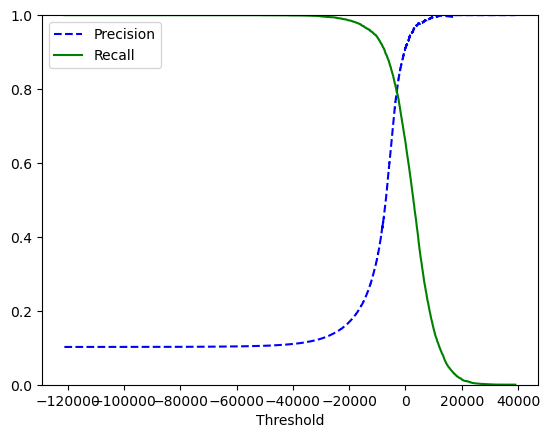

In [26]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [27]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/home/torrescayo/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([-2007.74749949])

In [28]:
threshold = 0
# let's ask for prediction
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [29]:
# now increase threshold value to 8000
threshold = -2500
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

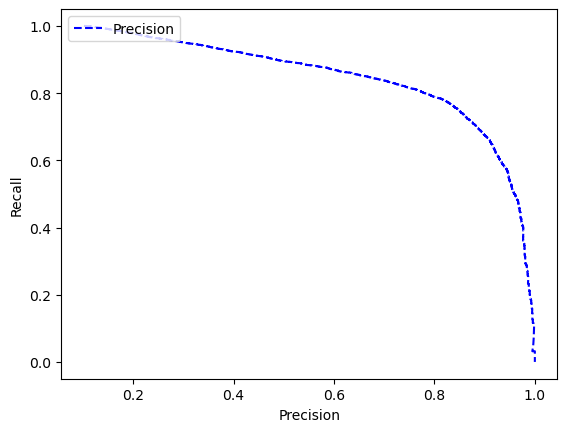

In [30]:
plt.plot(precisions, recalls, "b--", label="Precision")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="upper left")
plt.show()

In [48]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [49]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3, method="decision_function")

In [50]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [51]:
precision_score(y_train_3, y_train_pred_90)

0.9000870700914236

In [52]:
recall_score(y_train_3, y_train_pred_90)

0.6744413635622247

In [53]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

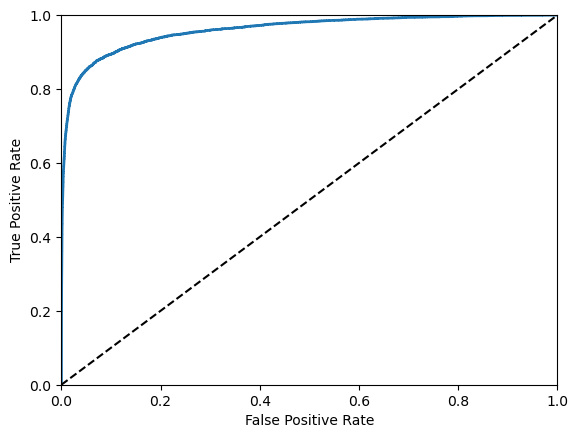

In [54]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)
# fpr = false positive rate = (1 - true negative rate)
# tpr = true positive rate
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr, "Roc Curve")
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_3, y_scores)

0.9599243001892759

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train,
                                    y_train_3, cv=3,
                                    method="predict_proba")
y_probas_forest

array([[0.62, 0.38],
       [1.  , 0.  ],
       [0.94, 0.06],
       ...,
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.98, 0.02]])

In [57]:
y_scores_forest = y_probas_forest[:, 1] 

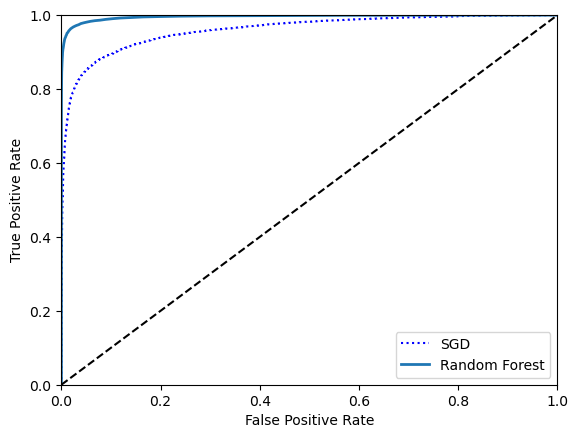

In [58]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3, 
                                                      y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [59]:
roc_auc_score(y_train_3, y_scores_forest)

0.995864544068936

**Multiclassification**

In [60]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array(['3'], dtype=object)

In [61]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[-0.31018911,  4.03087772,  7.23754402,  9.31413853,  3.80542049,
         1.7591253 ,  0.72090906,  7.20211051,  6.24065805,  4.88460105]])

In [62]:
np.argmax(some_digit_scores)

3

In [63]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [64]:
svm_clf.classes_[3]

'3'

In [65]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [66]:
len(ovr_clf.estimators_)

10

In [67]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [68]:
sgd_clf.decision_function([some_digit])

array([[-56545.14927711,  -6536.9783528 ,  -9430.78134912,
          2695.944863  , -12600.99087281, -13664.16824709,
        -21663.41318847, -10944.49980607,  -4613.68955027,
        -12425.07180775]])

In [69]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring = "accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

**Random Forest Multiclass**

In [71]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])
forest_clf.predict_proba([some_digit])

array([[0.  , 0.01, 0.01, 0.86, 0.  , 0.01, 0.  , 0.04, 0.02, 0.05]])

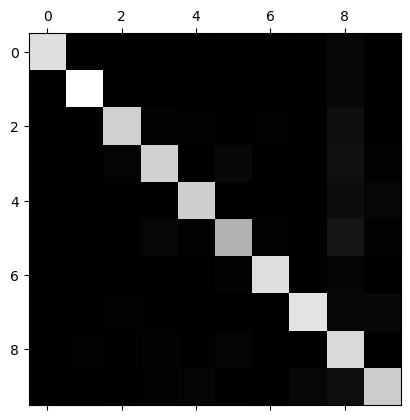

In [72]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

<Figure size 4000x2000 with 0 Axes>

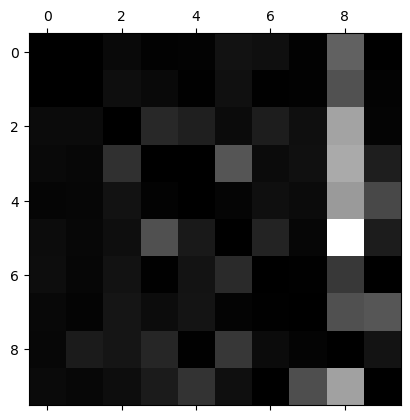

In [73]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums # to normalize the matrix
np.fill_diagonal(norm_conf_mx, 0) # to see only errors
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=200, facecolor='w', edgecolor='k')
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()